### Used libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from tabulate import tabulate

%matplotlib inline

### Importing data

In [95]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("store.csv")
train.head()

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [96]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [97]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### 1. Data cleaning and exploration

##### . Merging store data to both train and test datasets using store code

In [98]:
train_data = pd.merge(train, store, on='Store')
test_data = pd.merge(test, store, on='Store')
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [99]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [100]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [101]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


##### Data wrangling

* Cleaning dates

In [102]:
train_data['CompetitionOpenSince_Date'] = train_data['CompetitionOpenSinceMonth'].astype(str) + " "  + train_data['CompetitionOpenSinceYear'].astype(str)
test_data['CompetitionOpenSince_Date'] = test_data['CompetitionOpenSinceMonth'].astype(str) + " "  + test_data['CompetitionOpenSinceYear'].astype(str)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince_Date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,9.0 2008.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,9.0 2008.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,9.0 2008.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,9.0 2008.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,9.0 2008.0


In [103]:
train_data['Promo2Since_Date'] = train_data['Promo2SinceWeek'].astype(str) + " "  + train_data['Promo2SinceYear'].astype(str)
test_data['Promo2Since_Date'] = test_data['Promo2SinceWeek'].astype(str) + " "  + test_data['Promo2SinceYear'].astype(str)

### 2. Utils

In [104]:
def hist_plot(x):
    plt.hist(train_data[x])
    plt.title(x + " distribution")
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.show() 

In [105]:
def data_plot(x, y):
    plt.plot(train_data[x], train_data[y])
    plt.title(y + " trends over the " + x)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()  

In [106]:
def plot_scatter(x, y):
    plt.scatter(train_data[x], train_data[y])
    plt.title(y + " trends over the " + x)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()  

In [107]:
def summary_freq(x, number, descending=True):
    table = train_data['Store'].value_counts().reset_index()
    table = table.rename(columns={x: "Count", "index": x})
    if descending:
        print(tabulate(table.head(number), headers = 'keys', tablefmt = 'fancy_grid'))
    else:
        print(tabulate(table.tail(number), headers = 'keys', tablefmt = 'fancy_grid'))

In [156]:
def format_table(table, length=15):
    print(tabulate(table.head(length), headers = 'keys',tablefmt = 'fancy_grid'))

### 2. Data analysis


●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?



In [108]:
columns = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear']

In [109]:
for var in columns:
    summary_freq(var, 5)

╒════╤═════════╤═════════╕
│    │   Store │   Count │
╞════╪═════════╪═════════╡
│  0 │    1023 │     942 │
├────┼─────────┼─────────┤
│  1 │     666 │     942 │
├────┼─────────┼─────────┤
│  2 │     675 │     942 │
├────┼─────────┼─────────┤
│  3 │     163 │     942 │
├────┼─────────┼─────────┤
│  4 │     674 │     942 │
╘════╧═════════╧═════════╛
╒════╤═════════════╤═════════╕
│    │   DayOfWeek │   Store │
╞════╪═════════════╪═════════╡
│  0 │        1023 │     942 │
├────┼─────────────┼─────────┤
│  1 │         666 │     942 │
├────┼─────────────┼─────────┤
│  2 │         675 │     942 │
├────┼─────────────┼─────────┤
│  3 │         163 │     942 │
├────┼─────────────┼─────────┤
│  4 │         674 │     942 │
╘════╧═════════════╧═════════╛
╒════╤════════╤═════════╕
│    │   Date │   Store │
╞════╪════════╪═════════╡
│  0 │   1023 │     942 │
├────┼────────┼─────────┤
│  1 │    666 │     942 │
├────┼────────┼─────────┤
│  2 │    675 │     942 │
├────┼────────┼─────────┤
│  3 │    16

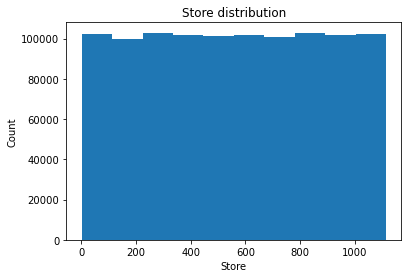

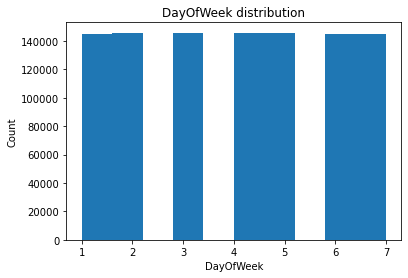

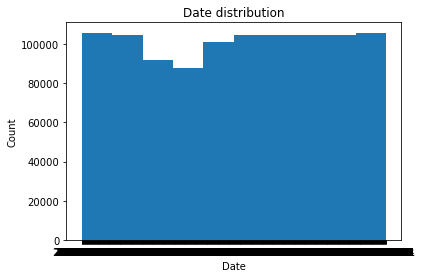

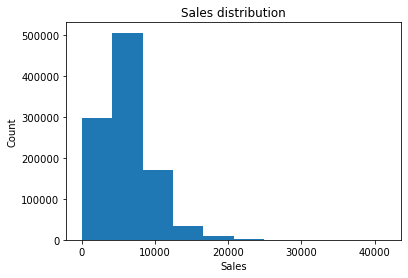

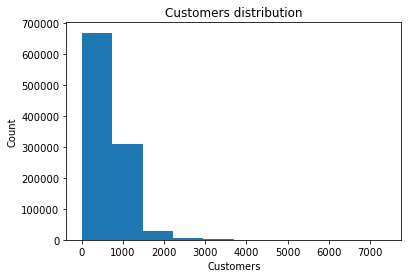

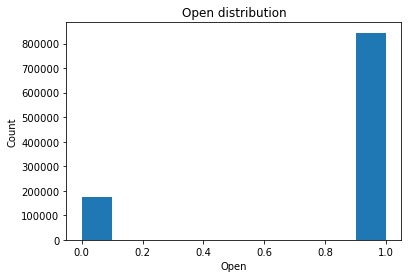

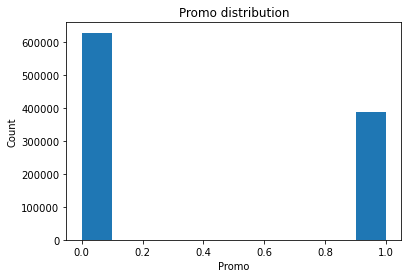

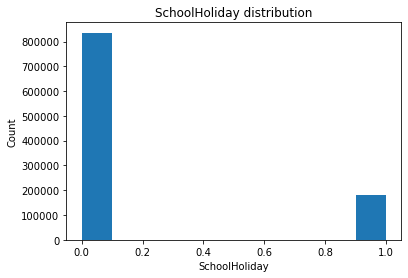

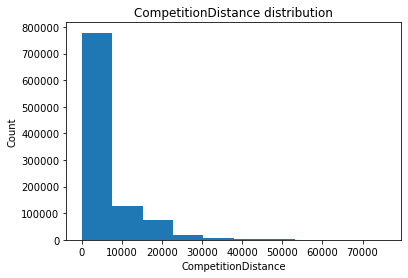

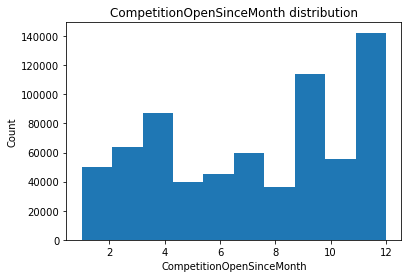

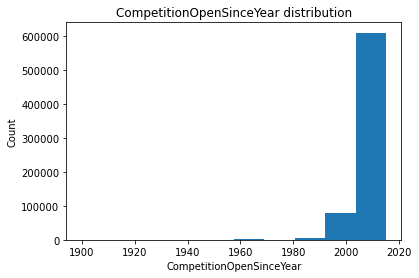

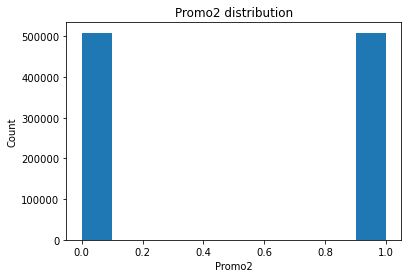

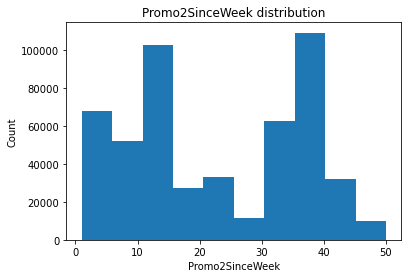

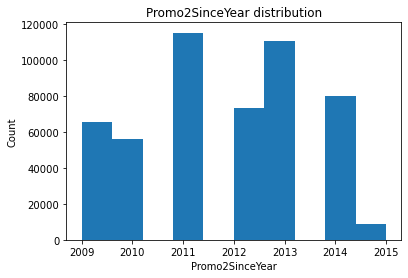

In [17]:
# Histogram
for var in columns:
    hist_plot(var)

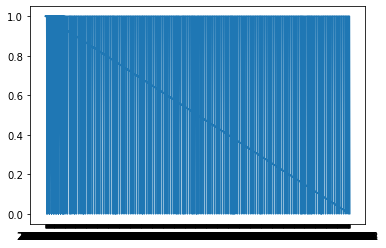

In [27]:
train2222 = train_data.head(1000)
plt.plot(train2222['Date'], train2222['Open'])

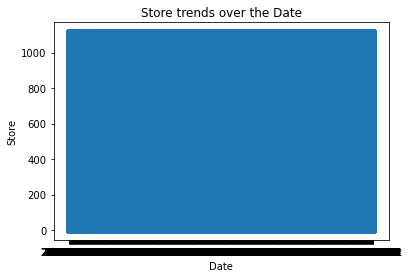

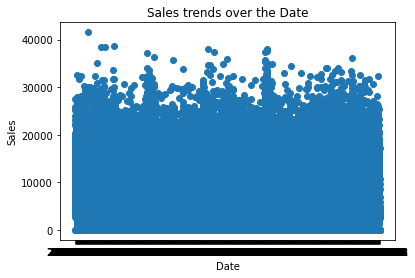

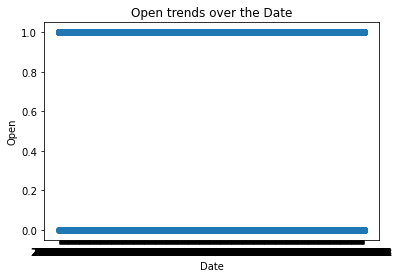

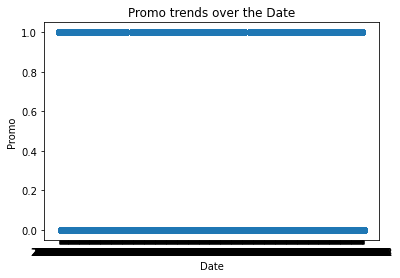

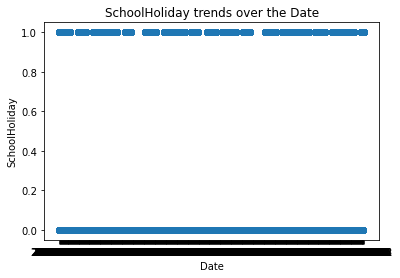

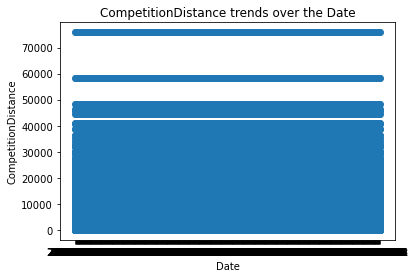

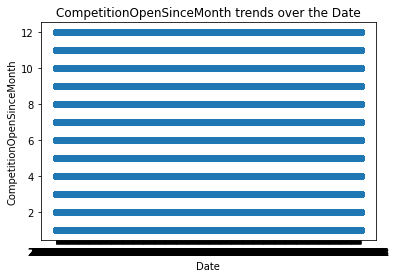

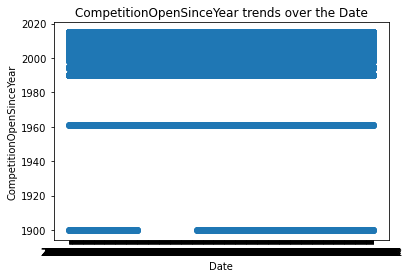

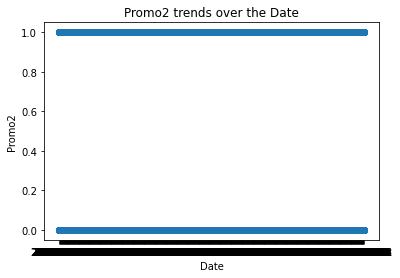

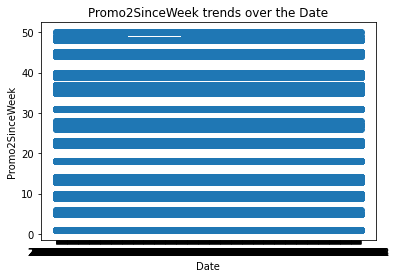

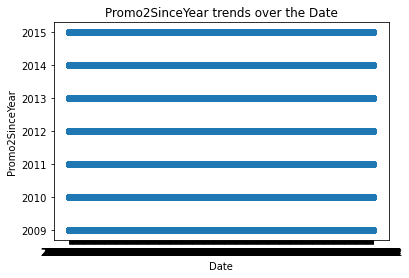

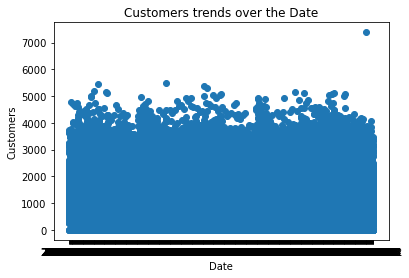

In [30]:
columns = ['Store', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Customers']

for var in columns:
    plot_scatter('Date', var)

●	Check & compare sales behavior before, during and after holidays

In [117]:
train_data["DateClean"]= pd.to_datetime(train_data["Date"])
train_data['Day'] = pd.DatetimeIndex(train_data['DateClean']).day
train_data['Month'] = pd.DatetimeIndex(train_data['DateClean']).month
train_data['Year'] = pd.DatetimeIndex(train_data['DateClean']).year
train_data['Month_Day'] = pd.DatetimeIndex(train_data['DateClean']).strftime('%m-%d')
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince_Date,Promo2Since_Date,DateClean,Day,Month,Year,Month_Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,9.0 2008.0,nan nan,2015-07-31,31,7,2015,07-31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,NaN,9.0 2008.0,nan nan,2015-07-30,30,7,2015,07-30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,NaN,9.0 2008.0,nan nan,2015-07-29,29,7,2015,07-29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,NaN,9.0 2008.0,nan nan,2015-07-28,28,7,2015,07-28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,NaN,9.0 2008.0,nan nan,2015-07-27,27,7,2015,07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-05,5,1,2013,01-05
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-04,4,1,2013,01-04
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-03,3,1,2013,01-03
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-02,2,1,2013,01-02


In [119]:
# Creating Holiday variable

train_data["Holiday"] = 0
mask = train_data['Month_Day'].isin(['12-20', '12-21', '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29', '12-30', '12-31'])
column_name = 'Holiday'
train_data.loc[mask, column_name] = 1

In [121]:
train_data.Holiday.value_counts()

0    992609
1     24600
Name: Holiday, dtype: int64

In [122]:
Holiday_data = train_data[train_data['Month'].isin([11, 12, 1])]

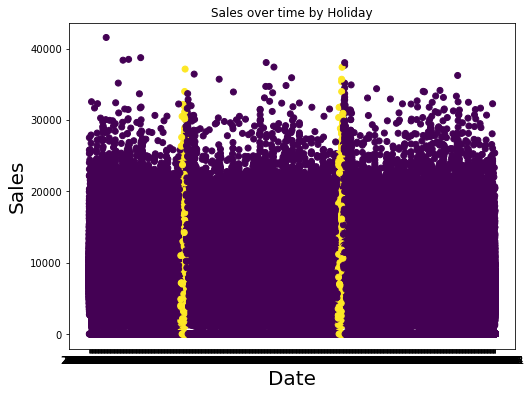

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(train_data.Date, train_data.Sales, c=train_data.Holiday)
plt.xlabel("Date", size=20)
plt.ylabel("Sales", size=20)
plt.title("Sales over time by Holiday")
plt.show()

As we see, in places where we have the holdisays taking case of Christmass period,  as well as days close to it (5 days before and after), the sales tend to be higher compared to other periods and this is repeated for those two holidays that we have in our data. Also, as it looks, sales Starts increasing rapidly in holidays period and and reachs the pick and then decreases slowly after holidays.


●	Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [124]:
Christmass = train_data[train_data['Month'].isin([12])]

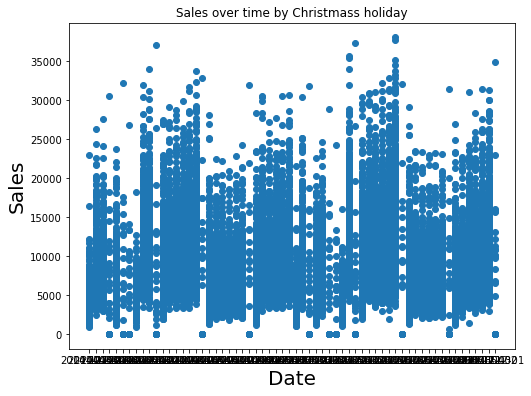

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(Christmass.Date, Christmass.Sales)
plt.xlabel("Date", size=20)
plt.ylabel("Sales", size=20)
plt.title("Sales over time by Christmass holiday")
plt.show()

In [126]:
Easter = train_data[train_data['Month'].isin([4])]

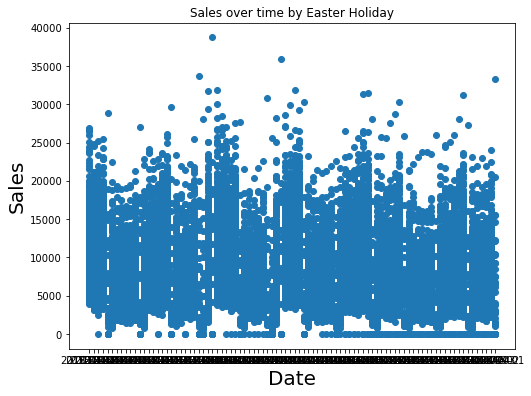

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(Easter.Date, Easter.Sales)
plt.xlabel("Date", size=20)
plt.ylabel("Sales", size=20)
plt.title("Sales over time by Easter Holiday")
plt.show()


●	What can you say about the correlation between sales and number of customers?

In [135]:
def correl_heat(data):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    # plot the heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdYlGn", annot=True)

<AxesSubplot:>

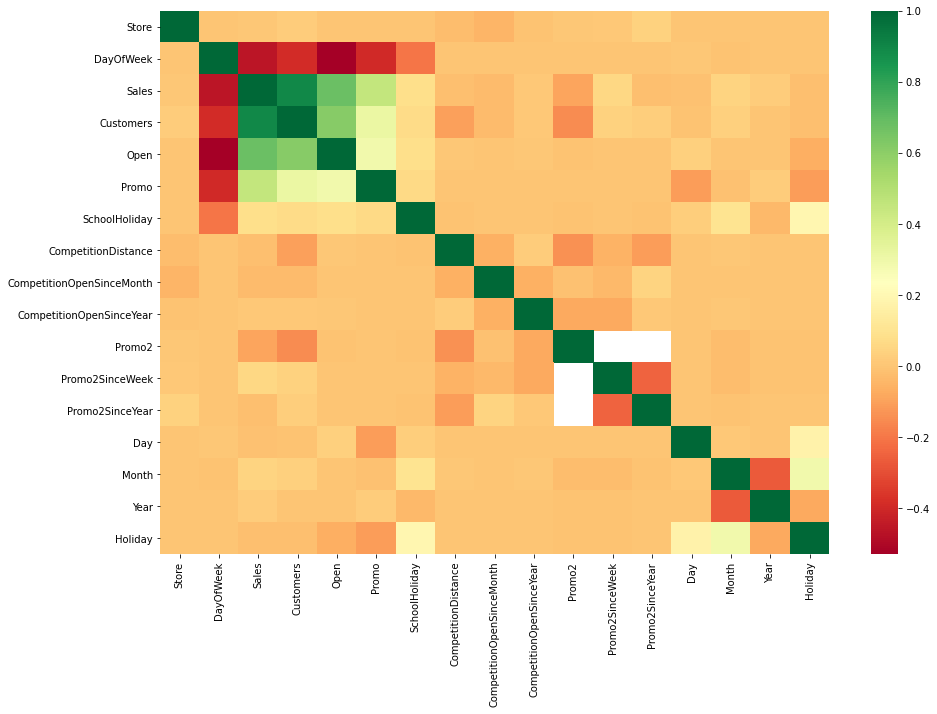

In [134]:
# calculate the correlation matrix
f, ax = plt.subplots(figsize=(15, 10))
corr = train_data.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdYlGn")


In [ ]:
promodata = train_data[['Promo', 'Sales']]
corr = promodata.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


●	How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

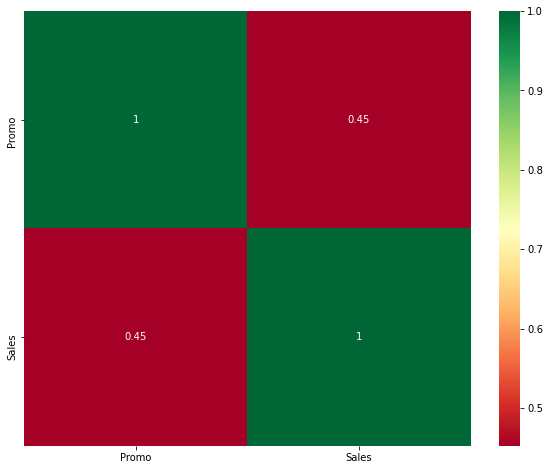

In [136]:
promodata = train_data[['Promo', 'Sales']]
correl_heat(promodata)

* According to the coorelation matrix, the promo has positive correklation with sales


●	Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [160]:
promo_comparison = pd.crosstab(train_data['Store'], train_data['Promo'], values=train_data['Sales'], aggfunc='mean', margins=True, margins_name='Total')
promo_comparison

Promo,0,1,Total
Store,,,
1,3198.994845,5152.886111,3945.704883
2,2855.058419,6172.816667,4122.991507
3,3967.596220,8608.666667,5741.253715
4,6568.939863,10370.511111,8021.769639
5,2582.271478,5944.266667,3867.110403
...,...,...,...
1112,5975.537801,12490.363889,8465.280255
1113,4400.362543,7320.086111,5516.180467
1114,14477.742268,21601.497222,17200.196391



●	Trends of customer behavior during store open and closing times

In [163]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,CompetitionOpenSince_Date,Promo2Since_Date,DateClean,Day,Month,Year,Month_Day,Holiday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,9.0 2008.0,nan nan,2015-07-31,31,7,2015,07-31,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,9.0 2008.0,nan nan,2015-07-30,30,7,2015,07-30,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,9.0 2008.0,nan nan,2015-07-29,29,7,2015,07-29,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,9.0 2008.0,nan nan,2015-07-28,28,7,2015,07-28,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,9.0 2008.0,nan nan,2015-07-27,27,7,2015,07-27,0


In [164]:
store_open = train_data[train_data['Open']==1]
store_close= train_data[train_data['Open']==0]

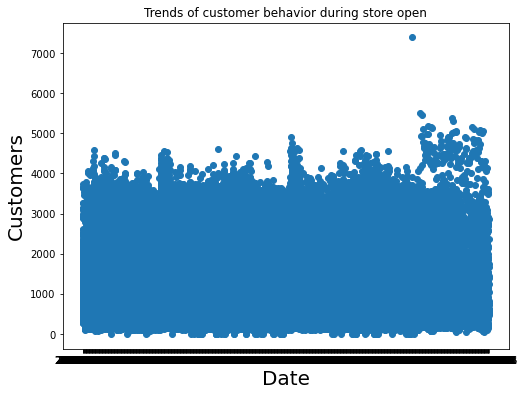

In [165]:
plt.figure(figsize=(8,6))
plt.scatter(store_open.Date, store_open.Customers)
plt.xlabel("Date", size=20)
plt.ylabel("Customers", size=20)
plt.title("Trends of customer behavior during store open")
plt.show()

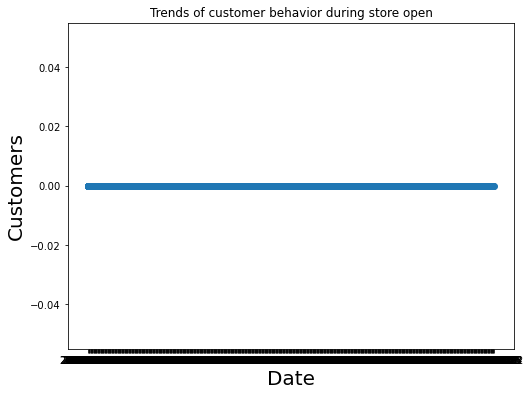

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(store_close.Date, store_close.Customers)
plt.xlabel("Date", size=20)
plt.ylabel("Customers", size=20)
plt.title("Trends of customer behavior during store open")
plt.show()

 As expected, the number of customers are higher when stores are open, and generally, the number of custmers is almost zero where the store is closed


●	Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [167]:
stores = train_data.Store.value_counts().reset_index()
stores = stores[stores['Store']==942]
stores = stores.rename(columns={"Store": "frequence", "index": "Store"})
stores

,Store,frequence
0,1023,942
1,666,942
2,675,942
3,163,942
4,674,942
...,...,...
929,491,942
930,837,942
931,836,942
932,838,942


In [168]:
train_data = train_data.merge(stores, how='left',  on='Store')
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,CompetitionOpenSince_Date,Promo2Since_Date,DateClean,Day,Month,Year,Month_Day,Holiday,frequence
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,9.0 2008.0,nan nan,2015-07-31,31,7,2015,07-31,0,942.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,9.0 2008.0,nan nan,2015-07-30,30,7,2015,07-30,0,942.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,9.0 2008.0,nan nan,2015-07-29,29,7,2015,07-29,0,942.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,9.0 2008.0,nan nan,2015-07-28,28,7,2015,07-28,0,942.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,9.0 2008.0,nan nan,2015-07-27,27,7,2015,07-27,0,942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-05,5,1,2013,01-05,0,942.0
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-04,4,1,2013,01-04,0,942.0
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-03,3,1,2013,01-03,0,942.0
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",nan nan,22.0 2012.0,2013-01-02,2,1,2013,01-02,0,942.0



●	Check how the assortment type affects sales

In [170]:
train_data.Assortment.value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


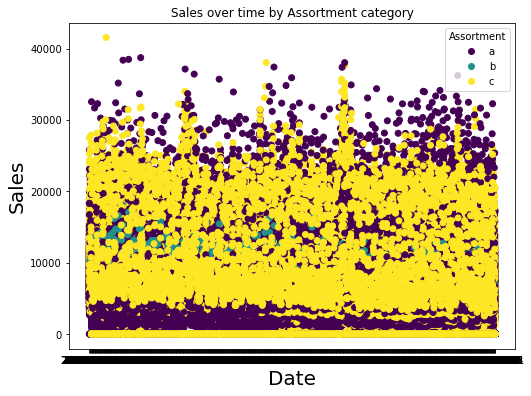

In [172]:
plt.figure(figsize=(8,6))
assorts = ['a', 'b', 'c', 'd']
scatter = plt.scatter(train_data.Date, train_data.Sales, c=train_data.Assortment.astype('category').cat.codes)
plt.xlabel("Date", size=20)
plt.ylabel("Sales", size=20)
plt.title("Sales over time by Assortment category")
plt.legend(handles=scatter.legend_elements()[0], labels=assorts, title="Assortment")
plt.show()


●	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?


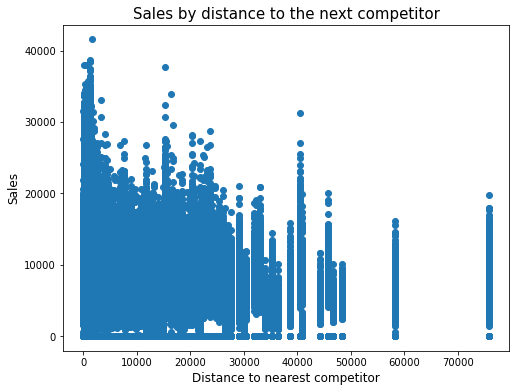

In [173]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(train_data.CompetitionDistance, train_data.Sales)
plt.xlabel("Distance to nearest competitor", size=12)
plt.ylabel("Sales", size=12)
plt.title("Sales by distance to the next competitor", size=15)
plt.show()

* Competition distance as it increases, sales decreases. This can be explain by the fact that many competitors are mainly in the same city where there are many clients, while when there are high distnaces, this can mean that the location is a vilage and there are few sales for those stores. 
* By this we can say that the distance does not matter for those stores taht are in a city center

●	How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

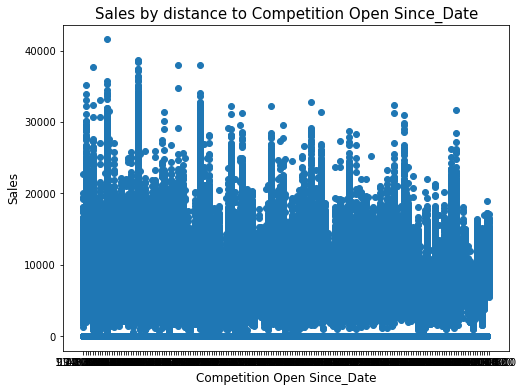

In [174]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(train_data.CompetitionOpenSince_Date, train_data.Sales)
plt.xlabel("Competition Open Since_Date", size=12)
plt.ylabel("Sales", size=12)
plt.title("Sales by distance to Competition Open Since_Date", size=15)
plt.show()